In [1]:
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
with open("/media/ubuntu/sda/Spike_Sorting/paper_architecture/01_real_data/01_flexible_probe_30_channels/spike_detection/eval_results/accuracy_dict.pkl", "rb") as f:
    accuracy_dict = pickle.load(f)

with open("/media/ubuntu/sda/Spike_Sorting/paper_architecture/01_real_data/01_flexible_probe_30_channels/spike_detection/eval_results/tnr_dict.pkl", "rb") as f:
    tnr_dict = pickle.load(f)

with open("/media/ubuntu/sda/Spike_Sorting/paper_architecture/01_real_data/01_flexible_probe_30_channels/spike_detection/eval_results/tpr_dict.pkl", "rb") as f:
    tpr_dict = pickle.load(f)

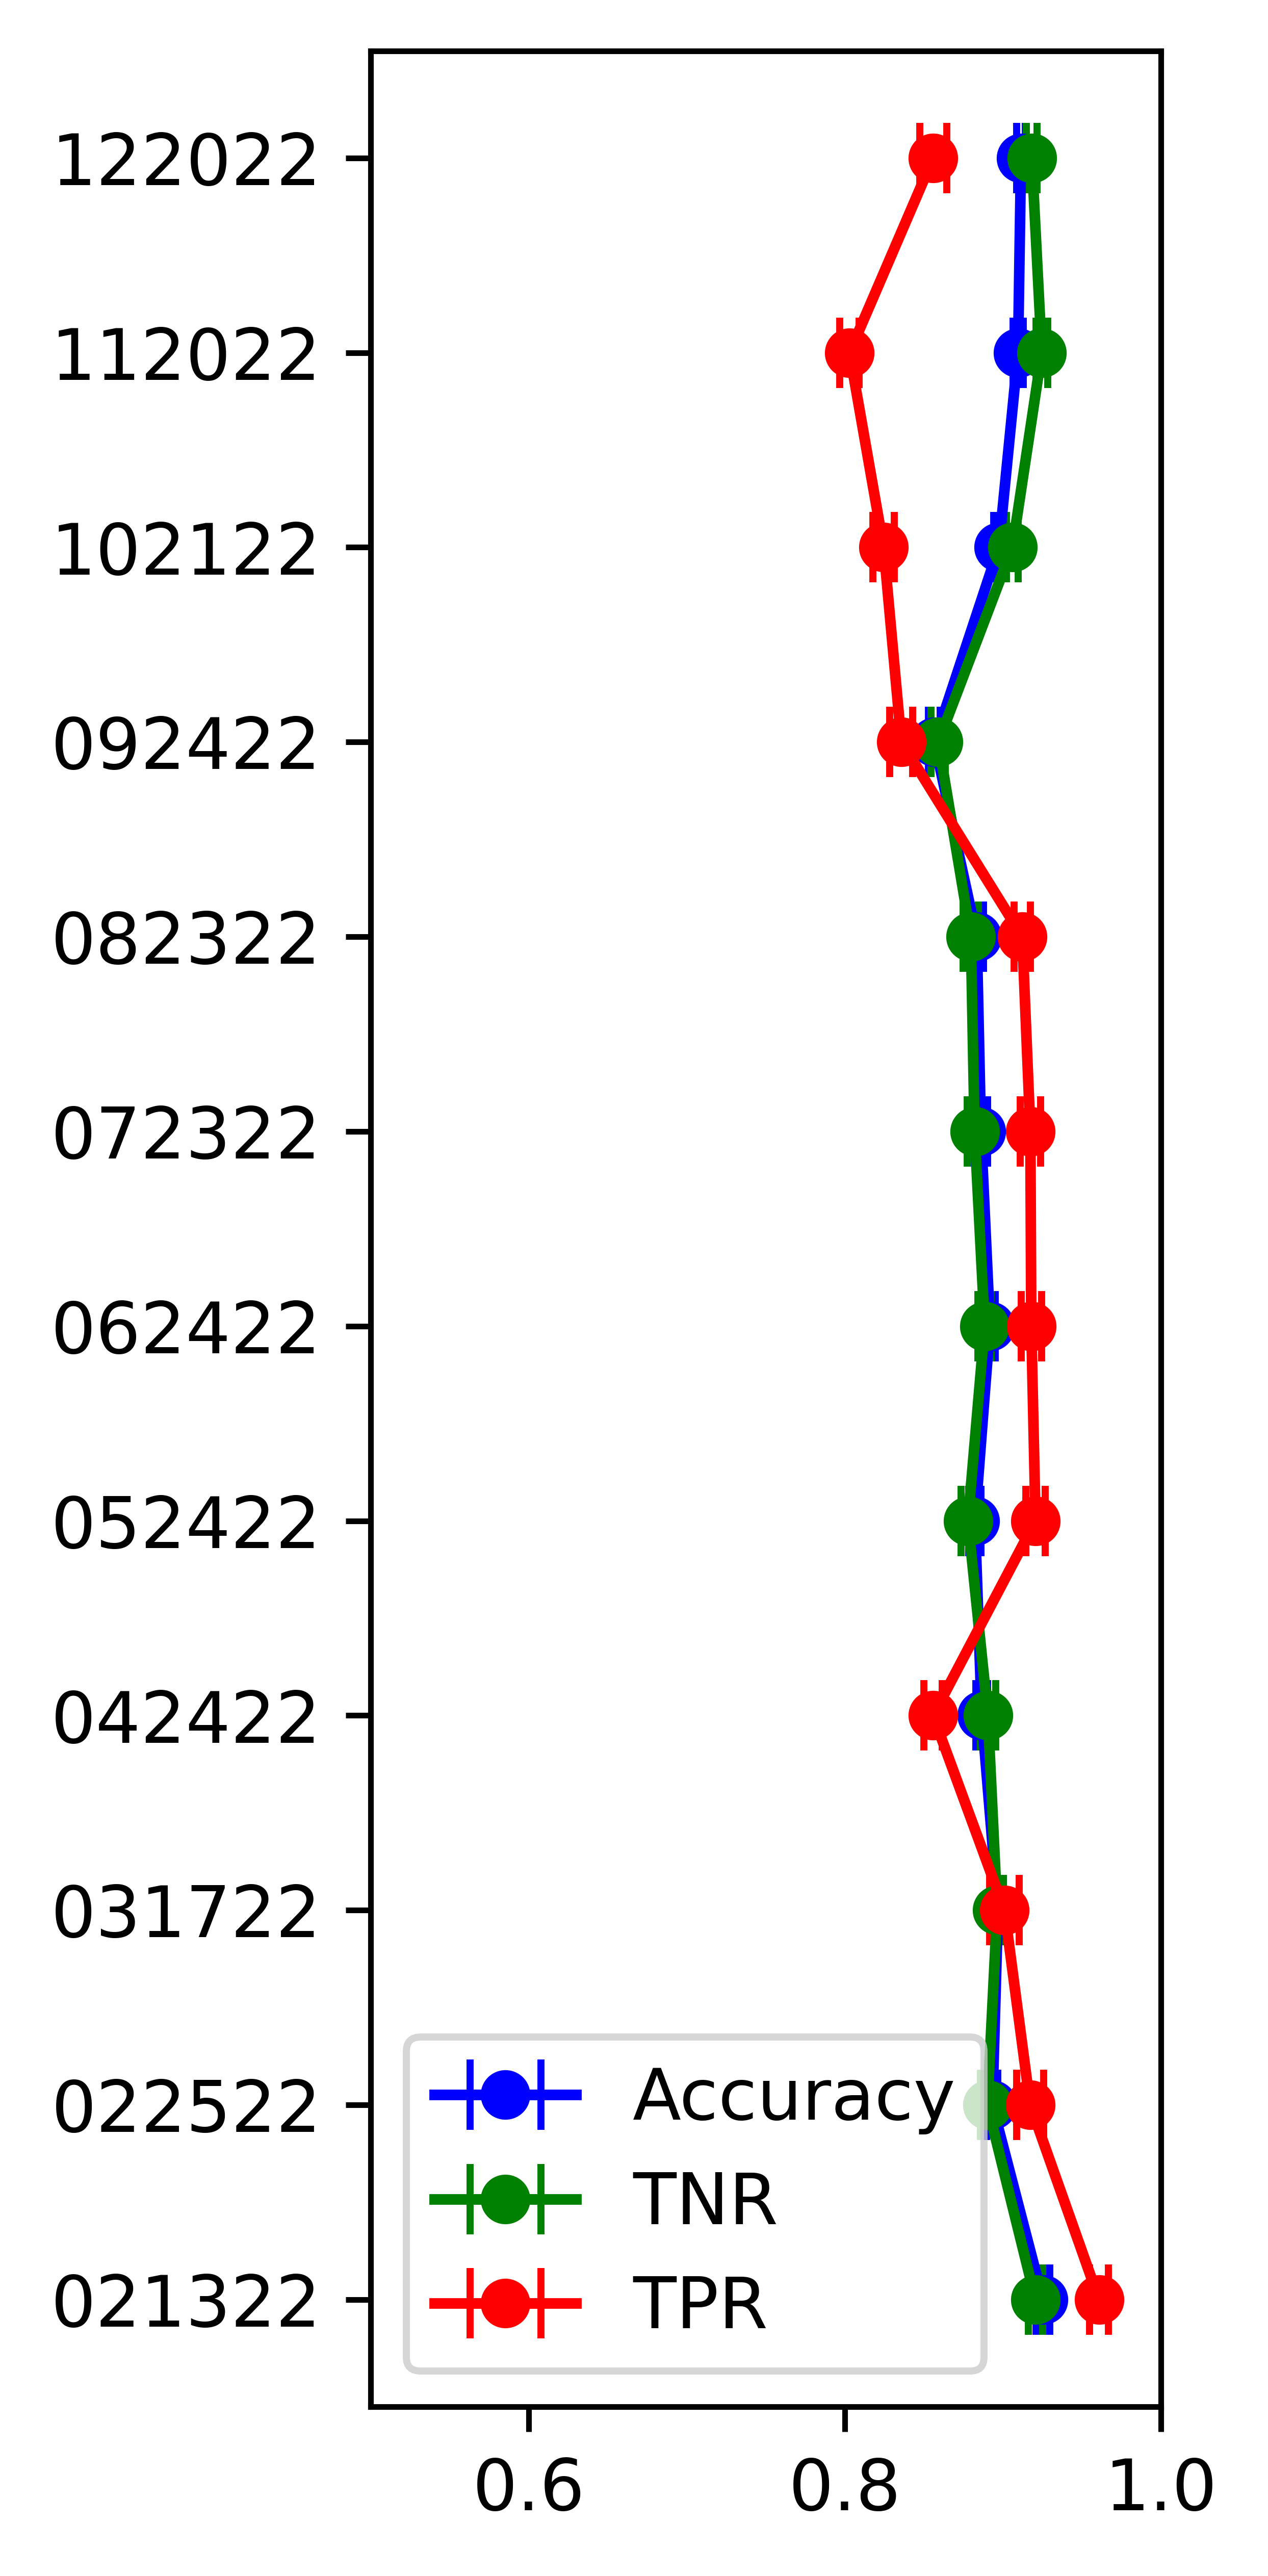

In [11]:
keys = list(accuracy_dict.keys())
means1 = [np.mean(accuracy_dict[key]) for key in keys]
stds1 = [np.std(accuracy_dict[key]) for key in keys]

means2 = [np.mean(tnr_dict[key]) for key in keys]
stds2 = [np.std(tnr_dict[key]) for key in keys]

means3 = [np.mean(tpr_dict[key]) for key in keys]
stds3 = [np.std(tpr_dict[key]) for key in keys]

plt.figure(figsize=(2, 6), dpi=1000)

plt.errorbar(means1, keys, xerr=stds1, fmt='-o', capsize=5, label='Accuracy', color='blue')

# 绘制第二个字典的点和线
plt.errorbar(means2, keys, xerr=stds2, fmt='-o', capsize=5, label='TNR', color='green')

# 绘制第三个字典的点和线
plt.errorbar(means3, keys, xerr=stds3, fmt='-o', capsize=5, label='TPR', color='red')

# 设置标签和标题

plt.legend()
plt.grid(False)
plt.xlim(0.5, 1)
plt.show()

In [12]:
with open("/media/ubuntu/sda/Spike_Sorting/paper_architecture/02_simulation_data/01_Neuroxenus_32_channels/spike_detection/eval_results/setting_2/val_results_Neuronexus_32_20_recording.pkl", "rb") as f:
    val_results = pickle.load(f)

In [23]:
grouped_data

{'val_results_Neuronexus_32_50_cell_overlapthreshold_02_recording': {'accuracy': [0.9914128952665411,
   0.9914697097591065,
   0.9910151938185832,
   0.9903009544834751,
   0.989838322186871],
  'tpr': [0.9909781268254689,
   0.9920977477769845,
   0.9909619004348673,
   0.9889336016096579,
   0.9901181281235802],
  'tnr': [0.9930172133809678,
   0.9922864566417668,
   0.9925462812601494,
   0.9923676518350114,
   0.9925462812601494]},
 'val_results_Neuronexus_32_50_cell_overlapthreshold_10_recording': {'accuracy': [0.989307461232443,
   0.9879353738735082,
   0.9864739790533409,
   0.9880409190549647,
   0.988292603718438],
  'tpr': [0.9899019607843137,
   0.9888888888888889,
   0.9869444444444444,
   0.9896078431372549,
   0.9899183006535948],
  'tnr': [0.9916249798289495,
   0.9878973696950137,
   0.9882846538647733,
   0.9903824431176376,
   0.9889139906406326]},
 'val_results_Neuronexus_32_50_cell_overlapthreshold_04_recording': {'accuracy': [0.9843738590726543,
   0.985533041255

In [34]:
a = os.listdir(subfolder_path)

In [39]:
sorted(a)

['val_results_Neuronexus_32_50_cell_cell_type_AC_recording.pkl',
 'val_results_Neuronexus_32_50_cell_cell_type_BC_recording.pkl',
 'val_results_Neuronexus_32_50_cell_cell_type_BP_recording.pkl',
 'val_results_Neuronexus_32_50_cell_cell_type_BTC_recording.pkl',
 'val_results_Neuronexus_32_50_cell_cell_type_ChC_recording.pkl',
 'val_results_Neuronexus_32_50_cell_cell_type_DBC_recording.pkl',
 'val_results_Neuronexus_32_50_cell_cell_type_MC_recording.pkl',
 'val_results_Neuronexus_32_50_cell_cell_type_NGC_recording.pkl',
 'val_results_Neuronexus_32_50_cell_cell_type_PC_recording.pkl',
 'val_results_Neuronexus_32_50_cell_cell_type_SP_recording.pkl',
 'val_results_Neuronexus_32_50_cell_cell_type_SS_recording.pkl']

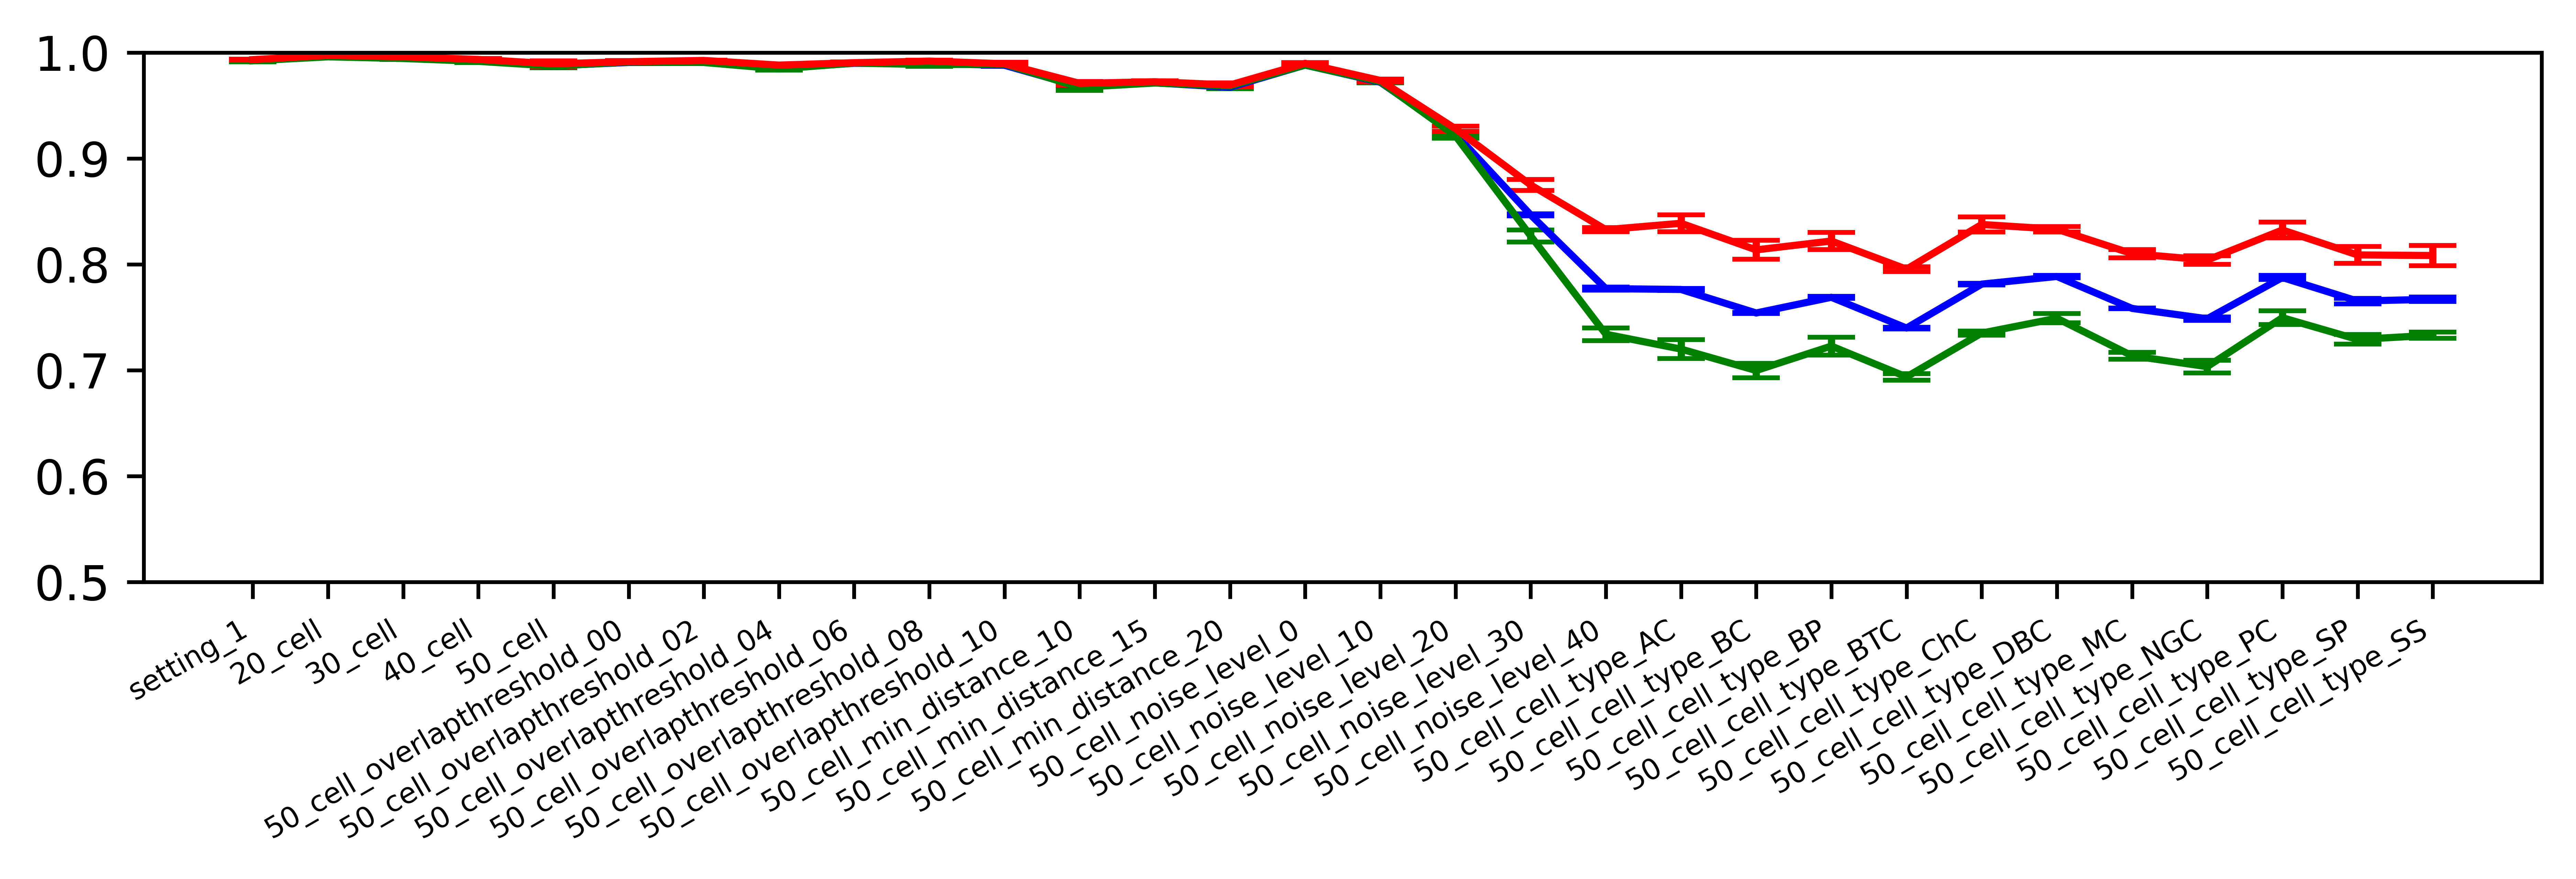

In [61]:
import os
import re

import pickle
import matplotlib.pyplot as plt
import numpy as np

root_folder = "/media/ubuntu/sda/Spike_Sorting/paper_architecture/02_simulation_data/01_Neuroxenus_32_channels/spike_detection/eval_results"


grouped_data = {}

# 遍历子文件夹和 .pkl 文件
for subfolder in ['setting_1', 'setting_2', 'setting_3', 'setting_4', 'setting_5', 'setting_6']:
    subfolder_path = os.path.join(root_folder, subfolder)
    if os.path.isdir(subfolder_path):  
        file_list = sorted(os.listdir(subfolder_path))
        for file in file_list:
            if file.endswith(".pkl"):  # 只处理 .pkl 文件
                file_path = os.path.join(subfolder_path, file)
                file_name = re.search(r'val_results_Neuronexus_32_(.*?)_recording', file.split(".")[0]).group(1)
                grouped_data[file_name] = {"accuracy": [], "tpr": [], "tnr": []}  # 初始化分组

                with open(file_path, "rb") as f:
                    pkl_data = pickle.load(f)  # 读取 .pkl 文件
                    # 将数据添加到对应分组
                    grouped_data[file_name]["accuracy"] = pkl_data.get("accuracy", [])
                    grouped_data[file_name]["tpr"] = pkl_data.get("tpr", [])
                    grouped_data[file_name]["tnr"] = pkl_data.get("tnr", [])

keys = list(grouped_data.keys())
metrics = ['accuracy', 'tpr', 'tnr']

# 初始化均值和标准差
means = {metric: [] for metric in metrics}
stds = {metric: [] for metric in metrics}

# 计算每个 key 的均值和标准差
for key in keys:
    for metric in metrics:
        means[metric].append(np.mean(grouped_data[key][metric]))
        stds[metric].append(np.std(grouped_data[key][metric]))

plt.figure(figsize=(9, 2), dpi = 1000)

for metric, color in zip(metrics, ['blue', 'green', 'red']):
    plt.errorbar(keys, means[metric], yerr=stds[metric], fmt='-', capsize=5, label=metric, color=color)


plt.grid(False)
plt.ylim(0.5, 1)
plt.xticks(rotation=30, ha='right', fontsize = 6)

plt.show()